# 第4章 混合ガウスモデル
## 多峰性分布

多峰性分布とは、複数の山を持つ分布のことである。例として、イエローストーン国立公園のオールド・フェイスフル・カイザーという有名な間欠泉の噴出のデータ(縦軸:噴出の間隔、横軸:噴出の継続時間)などがある

### 多峰性分布の可視化

In [2]:
import numpy as np
import matplotlib.pyplot as plt
path = './old_faithful.txt'
xs = np.loadtxt(path)
print(xs[0])

[ 3.6 79. ]


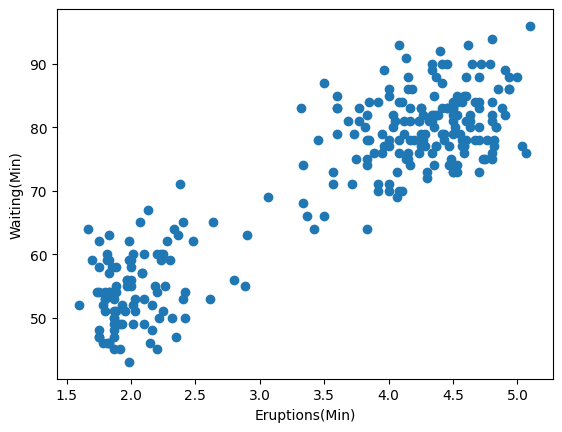

In [3]:
plt.scatter(xs[:,0], xs[:,1])
plt.xlabel('Eruptions(Min)') # 噴出した時間
plt.ylabel('Waiting(Min)') # 噴出の間隔
plt.show()

## 混合ガウスモデルのデータ生成

多峰性分布は複数の正規分布を組み合わせて表現できる。複数の正規分布からなるモデルは混合ガウスモデル(Gaussian Mixture Model)と呼ばれる。混合ガウスモデルは英語の頭文字をとってGMMとも呼ばれる

### データ生成
2つの正規分布のパラメータ(平均と分散)をmusとcovsとして用意する。これら2つの正規分布にたいして各正規分布の選ばれる確率をphisとして用意する。以下の例では1つ目の正規分布が選ばれる確率が0.35ということである。

In [4]:
mus = np.array([[2.0, 54.50], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]],
                 [[0.17, 0.94], [0.94, 36.0]]])
phis = np.array([0.35, 0.65])

def sample():
    z = np.random.choice(2, p=phis) # phisの確率にしたがって0,1のいずれかをサンプリング
    mu, cov = mus[z], covs[z]
    x = np.random.multivariate_normal(mu, cov) # 多次元正規分布からのサンプリング
    return x

これを用いて実際にサンプリングして散布図を描画する

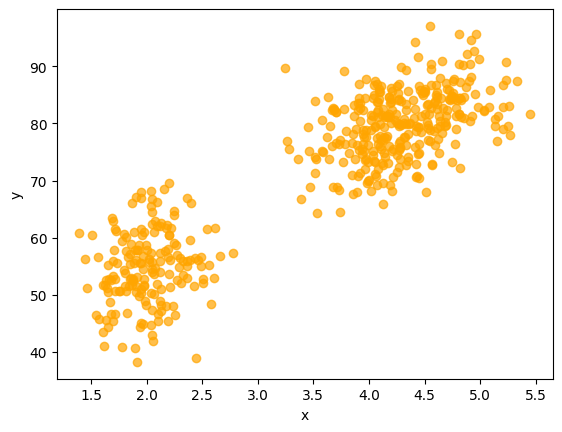

In [5]:
N = 500
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()

plt.scatter(xs[:,0], xs[:,1], color='orange', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 混合ガウスモデル
### 確率の復習
確率変数$x, y$があるときに、$p\left(x, y\right)$を同時確率(Joint Probability)と呼ぶ。また、周辺確率(Marginal Probability)は$p\left(x\right)$などのような単独の確率を指す。同時確率から特定の確率変数を取り除き周辺確率を求めることを、周辺化(Marginalizetion)と呼ぶ。$y$が離散変数の場合、周辺化は
$$
p\left(x\right) = \sum_{y}{p\left(x, y\right)}
$$
とかける。$y$が連続変数の場合、
$$
p\left(x\right) = \int{p\left(x, y\right)}dy
$$
とかける。また、条件付き確率(Conditional Probability)$p\left(x|y\right)$に対して、次の乗法定理が成り立つ。
$$
p\left(x,y\right) = p\left(x|y\right)p\left(y\right)
$$